# **Download the Datasets**

In [1]:
import yfinance as yf

# Define ticker symbols and friendly names
tickers = {
    'NFLX': 'Netflix',
    'GM': 'GeneralMotors',
    'MSFT': 'Microsoft'
}

# Define date range
start_date = "2020-04-01"
end_date = "2025-04-01"

# Download full datasets and save
for symbol, company in tickers.items():
    data = yf.download(symbol, start=start_date, end=end_date)

    # Save full dataset without dropping any columns
    filename = f"{company}_FullStockData.csv"
    data.to_csv(filename)

    print(f"{company} data saved as {filename}")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Netflix data saved as Netflix_FullStockData.csv
GeneralMotors data saved as GeneralMotors_FullStockData.csv


[*********************100%***********************]  1 of 1 completed


Microsoft data saved as Microsoft_FullStockData.csv


# **Import nesscary Libraries**

In [2]:
!pip install visualkeras

In [3]:
# Import required libraries

import pandas as pd
import numpy as np

from tensorflow import keras  # DL architecture
from sklearn.preprocessing import StandardScaler # standardising
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt # visualization
import plotly.graph_objects as go
import plotly.express as px
import visualkeras
pd.options.plotting.backend = "plotly"

In [4]:
# Load Netflix data
netflix_data = pd.read_csv('Netflix_FullStockData.csv')
# Load General Motors data
gm_data = pd.read_csv('GeneralMotors_FullStockData.csv')
# Load Microsoft data
microsoft_data = pd.read_csv('Microsoft_FullStockData.csv')

In [5]:
# Display the head of each dataset as a clean table
print("\nNetflix Data - Head:")

netflix_data.head()





Netflix Data - Head:


,Price,Close,High,Low,Open,Volume
0,Ticker,NFLX,NFLX,NFLX,NFLX,NFLX
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-04-01,364.0799865722656,380.2300109863281,361.0199890136719,376.04998779296875,6672500
3,2020-04-02,370.0799865722656,370.989990234375,360.05999755859375,364.0799865722656,4592500
4,2020-04-03,361.760009765625,370.8999938964844,357.510009765625,367.4700012207031,4860800


In [6]:
print("\nGM Data - Head")
gm_data.head()





GM Data - Head


,Price,Close,High,Low,Open,Volume
0,Ticker,GM,GM,GM,GM,GM
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-04-01,18.72736930847168,19.612203317330298,18.464835651882503,18.96073194057272,17467100
3,2020-04-02,17.686960220336914,19.14547806264438,17.29802249997519,18.571794229635337,17920600
4,2020-04-03,17.541107177734375,18.260642357220433,17.35636108224705,17.891150166245783,13835500


In [7]:
print("\nMicrosoft Data - Head")
microsoft_data.head()


Microsoft Data - Head


,Price,Close,High,Low,Open,Volume
0,Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-04-01,145.596435546875,150.99492219682824,144.36168159521696,146.44832390564008,57969900
3,2020-04-02,148.611572265625,148.82215276585558,143.9214020813381,145.35717025269807,49630700
4,2020-04-03,147.24281311035156,150.64080069189777,145.67304049930848,148.45843424740835,41243300


# **Data Preprocessing**

## **Drop unnecessary rows**

In [8]:
# Drop the first two rows and reset the index for all datasets
for df in [netflix_data, gm_data, microsoft_data]:
    df.drop(index=[0, 1], inplace=True)
    df.reset_index(drop=True, inplace=True)

    # Set proper column names for all datasets
    df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']





---


these rows contains ticker and null values which are not the stock data because I removed these rows and set the headers in each columns properly


---



In [9]:
# Display the head of each dataset as a clean table
print("\nNetflix Data - Head:")
print(netflix_data.head().to_string(index=False))

print("\nGeneral Motors Data - Head:")
print(gm_data.head().to_string(index=False))

print("\nMicrosoft Data - Head:")
print(microsoft_data.head().to_string(index=False))


Netflix Data - Head:
      Date             Close              High                Low               Open  Volume
2020-04-01 364.0799865722656 380.2300109863281  361.0199890136719 376.04998779296875 6672500
2020-04-02 370.0799865722656  370.989990234375 360.05999755859375  364.0799865722656 4592500
2020-04-03  361.760009765625 370.8999938964844   357.510009765625  367.4700012207031 4860800
2020-04-06 379.9599914550781 380.2900085449219  361.7099914550781  365.2200012207031 8183900
2020-04-07 372.2799987792969 381.3299865722656  369.3399963378906              380.0 7046400

General Motors Data - Head:
      Date              Close               High                Low               Open   Volume
2020-04-01  18.72736930847168 19.612203317330298 18.464835651882503  18.96073194057272 17467100
2020-04-02 17.686960220336914  19.14547806264438  17.29802249997519 18.571794229635337 17920600
2020-04-03 17.541107177734375 18.260642357220433  17.35636108224705 17.891150166245783 13835500
2020-04

In [10]:
# Display the df.info() for each dataset
print("\nNetflix Data - Info:")
print(netflix_data.info())

print("\nGeneral Motors Data - Info:")
print(gm_data.info())

print("\nMicrosoft Data - Info:")
print(microsoft_data.info())


Netflix Data - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1256 non-null   object
 1   Close   1256 non-null   object
 2   High    1256 non-null   object
 3   Low     1256 non-null   object
 4   Open    1256 non-null   object
 5   Volume  1256 non-null   object
dtypes: object(6)
memory usage: 59.0+ KB
None

General Motors Data - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1256 non-null   object
 1   Close   1256 non-null   object
 2   High    1256 non-null   object
 3   Low     1256 non-null   object
 4   Open    1256 non-null   object
 5   Volume  1256 non-null   object
dtypes: object(6)
memory usage: 59.0+ KB
None

Microsoft Data - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [11]:
# List of datasets
datasets = [netflix_data, gm_data, microsoft_data]

# Convert 'Date' column to datetime format for each dataset using a loop
for df in datasets:
    df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.tz_localize(None)


In [12]:
# Convert object type columns to numeric for each dataset using a loop
for df in datasets:
    cols_to_convert = df.select_dtypes(include='object').columns
    df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')



---


Converted the Date columns to datetime format and object columns to numerical types to enable accurate time-based operations  ensure compatibility with statistical models, visualizations, and machine learning algorithms that require numeric input for accurate computations and performance.


---



In [13]:
# Verify by displaying the info() for each dataset
print("\nNetflix Data - Info After Conversion:")
print(netflix_data.info())

print("\nGeneral Motors Data - Info After Conversion:")
print(gm_data.info())

print("\nMicrosoft Data - Info After Conversion:")
print(microsoft_data.info())


Netflix Data - Info After Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1256 non-null   datetime64[ns]
 1   Close   1256 non-null   float64       
 2   High    1256 non-null   float64       
 3   Low     1256 non-null   float64       
 4   Open    1256 non-null   float64       
 5   Volume  1256 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.0 KB
None

General Motors Data - Info After Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1256 non-null   datetime64[ns]
 1   Close   1256 non-null   float64       
 2   High    1256 non-null   float64       
 3   Low     1256 non-null   float64       
 4   Open   

In [14]:
dataset_names = ['Netflix', 'General Motors', 'Microsoft']

# Display null values count for each dataset
for name, df in zip(dataset_names, datasets):
    print(f"{name} - Null Values Count:")
    print(df.isnull().sum())
    print("\n" + "-"*50 + "\n")

Netflix - Null Values Count:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

--------------------------------------------------

General Motors - Null Values Count:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

--------------------------------------------------

Microsoft - Null Values Count:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

--------------------------------------------------



In [15]:
# Display descriptive statistics for each dataset
for name, df in zip(dataset_names, datasets):
    print(f"{name} - Descriptive Statistics:")
    print(df.describe())
    print("\n" + "-"*50 + "\n")

Netflix - Descriptive Statistics:
                                Date        Close         High          Low  \
count                           1256  1256.000000  1256.000000  1256.000000   
mean   2022-09-28 07:19:06.496815360   499.259012   506.285652   492.010733   
min              2020-04-01 00:00:00   166.369995   172.059998   162.710007   
25%              2021-06-29 18:00:00   373.432503   380.724998   366.602501   
50%              2022-09-27 12:00:00   491.884995   498.059998   486.044998   
75%              2023-12-27 06:00:00   604.625000   611.410004   595.297485   
max              2025-03-31 00:00:00  1058.599976  1064.500000  1041.689941   
std                              NaN   184.253693   185.878695   182.618197   

              Open        Volume  
count  1256.000000  1.256000e+03  
mean    499.218965  6.181461e+06  
min     163.960007  1.144000e+06  
25%     374.960007  3.163925e+06  
50%     492.220001  4.577500e+06  
75%     603.082489  7.060225e+06  
max    10

In [16]:
for name, df in zip(dataset_names, datasets):
    # Group by the year extracted from the Date column and count unique days
    days_per_year = df.groupby(df['Date'].dt.year)['Date'].nunique().reset_index(name='Days Count')

    # Display the result for each dataset
    print(f"{name} - Unique Days per Year:")
    print(days_per_year)
    print("\n")

Netflix - Unique Days per Year:
   Date  Days Count
0  2020         191
1  2021         252
2  2022         251
3  2023         250
4  2024         252
5  2025          60


General Motors - Unique Days per Year:
   Date  Days Count
0  2020         191
1  2021         252
2  2022         251
3  2023         250
4  2024         252
5  2025          60


Microsoft - Unique Days per Year:
   Date  Days Count
0  2020         191
1  2021         252
2  2022         251
3  2023         250
4  2024         252
5  2025          60




# **EDA Analysis**

In [17]:
import plotly.graph_objects as go

# Define dataset and names
datasets = [netflix_data, gm_data, microsoft_data]
names = ['Netflix', 'General Motors', 'Microsoft']

# Loop through each dataset to create separate plots
for df, name in zip(datasets, names):
    fig = go.Figure()

    # Closing Price
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'],
                             mode='lines', name='Closing Price', line=dict(color='blue')))

    # Opening Price
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Open'],
                             mode='lines', name='Opening Price', line=dict(color='green')))

    # Layout
    fig.update_layout(title=f"{name} - Closing and Opening Prices Over Time",
                      xaxis_title="Date",
                      yaxis_title="Price (USD)",
                      template="plotly_dark")

    fig.show()


In [18]:
for df, name in zip(datasets, names):
    fig = px.line(df, x='Date',
                  y='Volume',
                  title=f"{name} - Stock Volume Over Time",
                  line_shape='linear',
                  template='plotly_dark')
    fig.show()

In [19]:
colors = [('blue', 'green'), ('purple', 'pink'), ('teal', 'gold')]

for df, name, (close_color, open_color) in zip(datasets, names, colors):
    # Closing Price Histogram
    fig = px.histogram(df, x='Close', nbins=50,
                       title=f"{name} - Closing Price Distribution",
                       color_discrete_sequence=[close_color])
    fig.update_layout(xaxis_title="Price (USD)", yaxis_title="Frequency", template="plotly_dark")
    fig.show()

    # Opening Price Histogram
    fig = px.histogram(df, x='Open', nbins=50,
                       title=f"{name} - Opening Price Distribution",
                       color_discrete_sequence=[open_color])
    fig.update_layout(xaxis_title="Price (USD)", yaxis_title="Frequency", template="plotly_dark")
    fig.show()

In [20]:
for df, name in zip(datasets, names):
    fig = go.Figure()

    # High Price
    fig.add_trace(go.Scatter(x=df['Date'], y=df['High'],
                             mode='lines', name='High Price', line=dict(color='green')))

    # Low Price
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Low'],
                             mode='lines', name='Low Price', line=dict(color='orange')))

    fig.update_layout(title=f"{name} - High and Low Prices Over Time",
                      xaxis_title="Date",
                      yaxis_title="Price (USD)",
                      template="plotly_dark")

    fig.show()

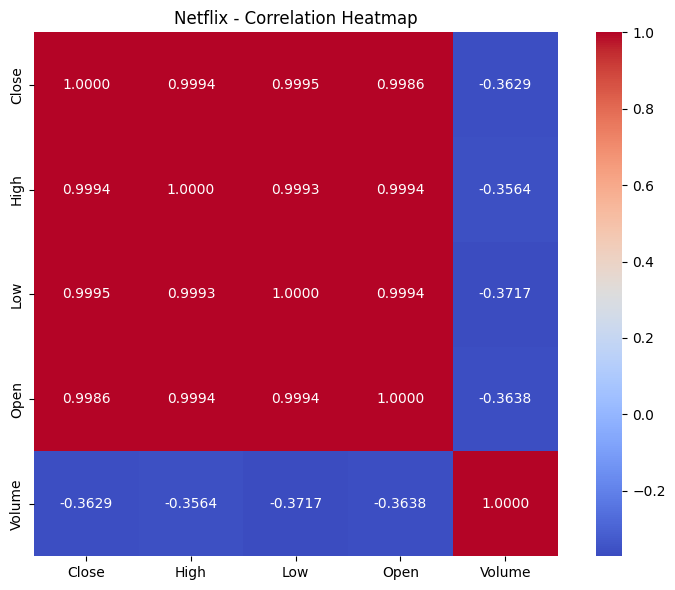

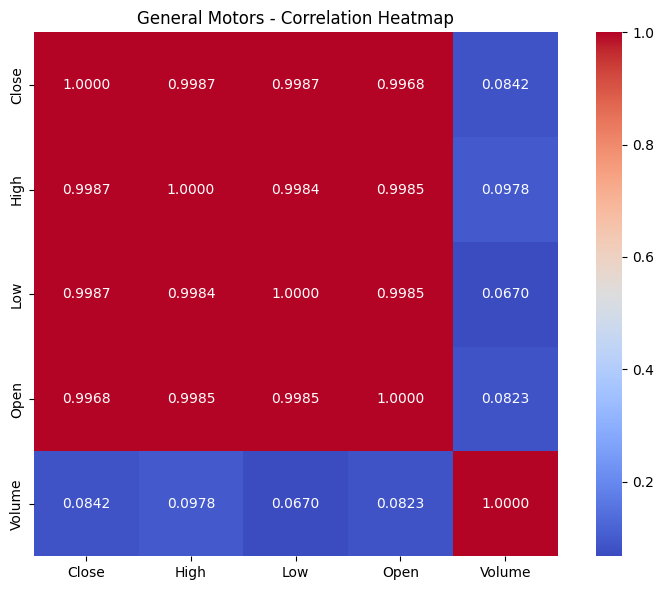

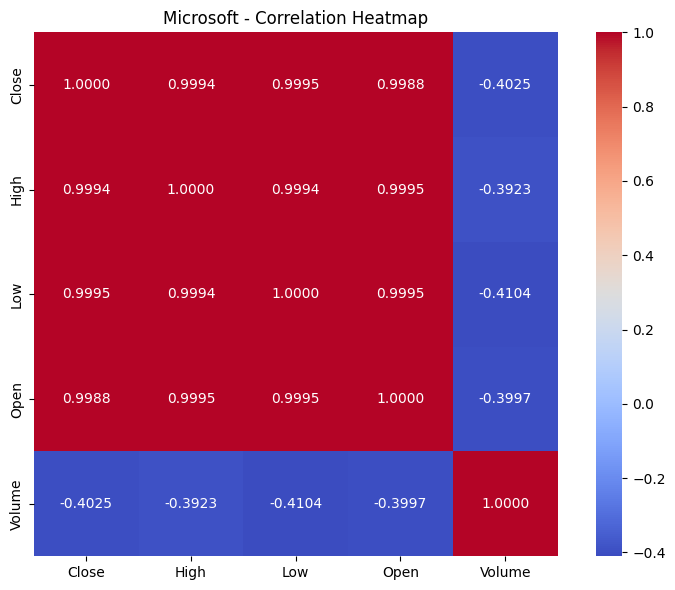

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through datasets and plot heatmaps
for name, df in zip(dataset_names, datasets):
    # Select only int and float columns
    num_df = df.select_dtypes(include=['int64', 'float64'])

    plt.figure(figsize=(8, 6))
    sns.heatmap(num_df.corr(), annot=True, fmt=".4f", cmap="coolwarm", square=True)
    plt.title(f"{name} - Correlation Heatmap")
    plt.tight_layout()
    plt.show()


In [22]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add trace for each dataset
for name, df in zip(dataset_names, datasets):
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name=name))

# Update layout
fig.update_layout(title="Closing Price Trends of All Stocks",
                  xaxis_title="Date",
                  yaxis_title="Closing Price (USD)",
                  template="plotly_dark")

fig.show()


## **Outlier Detection**

In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

for df, name in zip(datasets, dataset_names):
    # Select only numeric columns, explicitly exclude 'Date' if it's present
    numeric_cols = [col for col in df.select_dtypes(include='number').columns if col.lower() != 'date']
    total = len(numeric_cols)
    rows = (total + 1) // 2  # Two plots per row

    # Create subplot figure
    fig = make_subplots(rows=rows, cols=2, subplot_titles=numeric_cols)

    row = 1
    col = 1
    for col_name in numeric_cols:
        fig.add_trace(
            go.Box(y=df[col_name], name=col_name, boxpoints='outliers', marker_color='indianred'),
            row=row, col=col
        )

        # Move to next subplot
        if col == 2:
            col = 1
            row += 1
        else:
            col += 1

    # Update layout
    fig.update_layout(
        title_text=f"{name} - Outlier Detection using Box Plots",
        height=300 * rows,
        showlegend=False,
        template="plotly_dark"
    )

    fig.show()

# **Handle Outliers using Capping method**

In [24]:
import pandas as pd

# Function to cap outliers based on IQR for the 'Close' column
def cap_close_outliers_iqr(df):
    df_capped = df.copy()
    col = 'Close'

    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for capping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the nearest non-outlier values for capping
    min_valid = df_capped[col][df_capped[col] >= lower_bound].min()
    max_valid = df_capped[col][df_capped[col] <= upper_bound].max()

    # Cap the outliers
    df_capped[col] = df_capped[col].apply(
        lambda x: min_valid if x < lower_bound else max_valid if x > upper_bound else x
    )

    return df_capped

# Apply the function to each dataset and store the result in a new variable
capped_netflix = cap_close_outliers_iqr(netflix_data)
capped_gm = cap_close_outliers_iqr(gm_data)
capped_microsoft = cap_close_outliers_iqr(microsoft_data)






---


Used the capping method to handle outliers in the closing price column in each dataset to reduce the impact of extreme values that could distort model training. This ensures more stable and accurate time series predictions by keeping the data within a reasonable range while preserving overall trend and seasonality.


---



In [25]:
datasets = [capped_netflix, capped_gm, capped_microsoft]
dataset_names = ['Netflix', 'GM', 'Microsoft']

for dataset, name in zip(datasets, dataset_names):
    fig = px.box(dataset, y='Close', title=f'{name} - Capped Closing Price', color_discrete_sequence=['skyblue'])
    fig.update_layout(yaxis_title="Price (USD)", template="plotly_dark")
    fig.show()

In [26]:
def count_capped_values(original_df, capped_df, column):
    # Compare the original and capped values to see how many were capped
    capped_count = (original_df[column] != capped_df[column]).sum()
    return capped_count

# Calculate and print the number of capped values for each dataset
datasets = [netflix_data, gm_data, microsoft_data]
capped_datasets = [capped_netflix, capped_gm, capped_microsoft]
dataset_names = ['Netflix', 'GM', 'Microsoft']
column = 'Close'  # Column to check for capped values

for original_df, capped_df, name in zip(datasets, capped_datasets, dataset_names):
    capped_count = count_capped_values(original_df, capped_df, column)
    print(f"Number of capped values in {name} - Closing Price: {capped_count}")


Number of capped values in Netflix - Closing Price: 36
Number of capped values in GM - Closing Price: 0
Number of capped values in Microsoft - Closing Price: 0


# **Train Test Data Preparation**

In [27]:
# Filter only the Date and Close columns and set Date as index in-place for each dataset

# For Netflix
netflix_filtered = capped_netflix[['Date', 'Close']]
netflix_filtered.set_index('Date', inplace=True)

# For GM
gm_filtered = capped_gm[['Date', 'Close']]
gm_filtered.set_index('Date', inplace=True)

# For Microsoft
microsoft_filtered = capped_microsoft[['Date', 'Close']]
microsoft_filtered.set_index('Date', inplace=True)

# Display the filtered data
print("Netflix Filtered Data:\n", netflix_filtered.head())
print("GM Filtered Data:\n", gm_filtered.head())
print("Microsoft Filtered Data:\n", microsoft_filtered.head())



Netflix Filtered Data:
                  Close
Date                  
2020-04-01  364.079987
2020-04-02  370.079987
2020-04-03  361.760010
2020-04-06  379.959991
2020-04-07  372.279999
GM Filtered Data:
                 Close
Date                 
2020-04-01  18.727369
2020-04-02  17.686960
2020-04-03  17.541107
2020-04-06  19.009348
2020-04-07  20.710951
Microsoft Filtered Data:
                  Close
Date                  
2020-04-01  145.596436
2020-04-02  148.611572
2020-04-03  147.242813
2020-04-06  158.192978
2020-04-07  156.489166


In [28]:
# For Netflix
netflix_train = netflix_filtered.loc[netflix_filtered.index < '2024-04-01']
netflix_test = netflix_filtered.loc[netflix_filtered.index >= '2024-04-01']

# For GM
gm_train = gm_filtered.loc[gm_filtered.index < '2024-04-01']
gm_test = gm_filtered.loc[gm_filtered.index >= '2024-04-01']

# For Microsoft
microsoft_train = microsoft_filtered.loc[microsoft_filtered.index < '2024-04-01']
microsoft_test = microsoft_filtered.loc[microsoft_filtered.index >= '2024-04-01']

# Display the shapes of the split datasets
print("Netflix Train Data Shape:", netflix_train.shape)
print("Netflix Test Data Shape:", netflix_test.shape)

print("GM Train Data Shape:", gm_train.shape)
print("GM Test Data Shape:", gm_test.shape)

print("Microsoft Train Data Shape:", microsoft_train.shape)
print("Microsoft Test Data Shape:", microsoft_test.shape)


Netflix Train Data Shape: (1005, 1)
Netflix Test Data Shape: (251, 1)
GM Train Data Shape: (1005, 1)
GM Test Data Shape: (251, 1)
Microsoft Train Data Shape: (1005, 1)
Microsoft Test Data Shape: (251, 1)


In [29]:
# For Netflix
netflix_train_values = netflix_train.values
netflix_test_values = netflix_test.values

# For GM
gm_train_values = gm_train.values
gm_test_values = gm_test.values

# For Microsoft
microsoft_train_values = microsoft_train.values
microsoft_test_values = microsoft_test.values



In [30]:
netflix_train_values

array([[364.07998657],
       [370.07998657],
       [361.76000977],
       ...,
       [629.23999023],
       [613.5300293 ],
       [607.33001709]])

In [31]:
gm_train_values

array([[18.72736931],
       [17.68696022],
       [17.54110718],
       ...,
       [43.56543732],
       [44.14960861],
       [44.90210342]])

In [32]:
microsoft_train_values

array([[145.59643555],
       [148.61157227],
       [147.24281311],
       ...,
       [418.4552002 ],
       [418.23687744],
       [417.5322876 ]])

# **Standardizing Stock Price Data**

In [33]:
# Standardize Netflix train & test data
scaler_netflix = StandardScaler()
scaled_netflix_train = scaler_netflix.fit_transform(netflix_train_values)
scaled_netflix_test = scaler_netflix.transform(netflix_test_values)

# Standardize GM train & test data
scaler_gm = StandardScaler()
scaled_gm_train = scaler_gm.fit_transform(gm_train_values)
scaled_gm_test = scaler_gm.transform(gm_test_values)

# Standardize Microsoft train & test data
scaler_microsoft = StandardScaler()
scaled_microsoft_train = scaler_microsoft.fit_transform(microsoft_train_values)
scaled_microsoft_test = scaler_microsoft.transform(microsoft_test_values)


# **Creating Sliding Window**

In [34]:
import numpy as np

# Function to create X_train and y_train using 90 days window
def create_90_day_window(scaled_data):
    X, y = [], []

    for i in range(90, len(scaled_data)):  # Sliding window of 90 days
        X.append(scaled_data[i-90:i, 0])  # Using only 'Close' price for input
        y.append(scaled_data[i, 0])  # Predict the next day's 'Close'

    X, y = np.array(X), np.array(y)

    # Reshape the data for LSTM input (samples, time_steps, features)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, y

# Create X_train and y_train for each stock
X_netflix_train, y_netflix_train = create_90_day_window(scaled_netflix_train)
X_gm_train, y_gm_train = create_90_day_window(scaled_gm_train)
X_microsoft_train, y_microsoft_train = create_90_day_window(scaled_microsoft_train)

# Display the shape of X_train and y_train for each stock
print(f"Netflix - X_train shape: {X_netflix_train.shape}, y_train shape: {y_netflix_train.shape}")
print(f"GM - X_train shape: {X_gm_train.shape}, y_train shape: {y_gm_train.shape}")
print(f"Microsoft - X_train shape: {X_microsoft_train.shape}, y_train shape: {y_microsoft_train.shape}")


Netflix - X_train shape: (915, 90, 1), y_train shape: (915,)
GM - X_train shape: (915, 90, 1), y_train shape: (915,)
Microsoft - X_train shape: (915, 90, 1), y_train shape: (915,)




---


creating training samples from the last 90 days of data to predict the next day's closing price. The X_train array contains sequences of 90 days' worth of closing price data (with a shape of (1925, 90, 1)),y_train array contains the next day's closing price,which serves as the target value for the model to predict.


---



In [35]:
y_netflix_train[0]

np.float64(0.40386526264718753)

In [36]:
y_gm_train[0]

np.float64(-1.2064619041532652)

In [37]:
y_microsoft_train[0]

np.float64(-1.2014447021700387)

In [38]:
len(X_netflix_train[0])

90

#**Combining Training and Test Data for Sequence Input**

# **Netflix**

In [39]:
# Combine last 90 data points from training data with scaled test data for Netflix
last_90_points_netflix = scaled_netflix_train[-90:]

# Concatenate it to test data
combined_test_data_netflix = np.concatenate((last_90_points_netflix, scaled_netflix_test), axis=0)

X_test_netflix, y_test_netflix = [], netflix_test_values

for i in range(90, len(combined_test_data_netflix)):
    X_test_netflix.append(combined_test_data_netflix[i-90:i, 0])

X_test_netflix = np.array(X_test_netflix)
X_test_netflix = np.reshape(X_test_netflix, (X_test_netflix.shape[0], X_test_netflix.shape[1], 1))

# **GM(General Motors)**

In [40]:
# Combine last 90 data points from training data with scaled test data for GM
last_90_points_gm = scaled_gm_train[-90:]
combined_test_data_gm = np.concatenate((last_90_points_gm, scaled_gm_test), axis=0)

X_test_gm, y_test_gm = [], gm_test_values

for i in range(90, len(combined_test_data_gm)):
    X_test_gm.append(combined_test_data_gm[i-90:i, 0])

X_test_gm = np.array(X_test_gm)
X_test_gm = np.reshape(X_test_gm, (X_test_gm.shape[0], X_test_gm.shape[1], 1))



# **Microsoft**

In [41]:
# Combine last 90 data points from training data with scaled test data for Microsoft
last_90_points_microsoft = scaled_microsoft_train[-90:]
combined_test_data_microsoft = np.concatenate((last_90_points_microsoft, scaled_microsoft_test), axis=0)

X_test_microsoft, y_test_microsoft = [], microsoft_test_values

for i in range(90, len(combined_test_data_microsoft)):
    X_test_microsoft.append(combined_test_data_microsoft[i-90:i, 0])

X_test_microsoft = np.array(X_test_microsoft)
X_test_microsoft = np.reshape(X_test_microsoft, (X_test_microsoft.shape[0], X_test_microsoft.shape[1], 1))





---


To predict the first value in the test set using an LSTM model, the model requires the previous 90 days of data as input. Since the test set starts immediately after the training set, these 90 days fall within the training period. Therefore, I combined the last 90 days from the training data with the test data to ensure the input sequence for the first prediction in the test set is complete.


---



# **Model Development**

## **Build the Model for Netflix, GM & Microsoft**

In [42]:
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

In [43]:
# Build the Model for MU, AMZN, and GOOG

model_netflix = keras.models.Sequential()
model_gm = keras.models.Sequential()
model_micro = keras.models.Sequential()


In [44]:
# First Layer for MU model
model_netflix.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_netflix_train.shape[1], 1)))
model_gm.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_gm_train.shape[1], 1)))
model_micro.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_microsoft_train.shape[1], 1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [45]:
# Second Layer for MU model
model_netflix.add(keras.layers.LSTM(64, return_sequences=False))
model_gm.add(keras.layers.LSTM(64, return_sequences=False))
model_micro.add(keras.layers.LSTM(64, return_sequences=False))

In [46]:
# Third Layer (Dense) for all models
model_netflix.add(keras.layers.Dense(128, activation="relu"))
model_gm.add(keras.layers.Dense(128, activation="relu"))
model_micro.add(keras.layers.Dense(128, activation="relu"))

In [47]:
# Fourth Layer (Dropout) for all models
model_netflix.add(keras.layers.Dropout(0.5))
model_gm.add(keras.layers.Dropout(0.5))
model_micro.add(keras.layers.Dropout(0.5))

In [48]:
# Final Output Layer for all models
model_netflix.add(keras.layers.Dense(1))
model_gm.add(keras.layers.Dense(1))
model_micro.add(keras.layers.Dense(1))

In [49]:
# Compile each model
model_netflix.compile(optimizer="adam", loss="mae", metrics=['mse'])
model_gm.compile(optimizer="adam", loss="mae", metrics=['mse'])
model_micro.compile(optimizer="adam", loss="mae", metrics=['mse'])

In [50]:
model_netflix .summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 90, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model_gm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 90, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model_micro.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 90, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning:

The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.



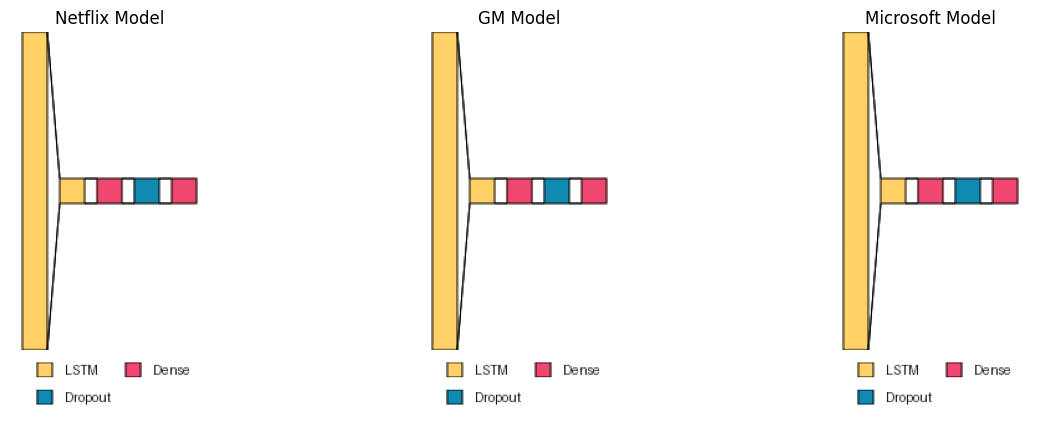

In [53]:
import visualkeras
import matplotlib.pyplot as plt

# Save the visual representation of each model as an image

# Netflix Model
netflix_plot = visualkeras.layered_view(model_netflix, legend=True, draw_volume=False)
netflix_plot.save('netflix_model_architecture.png')

# GM Model
gm_plot = visualkeras.layered_view(model_gm, legend=True, draw_volume=False)
gm_plot.save('gm_model_architecture.png')

# Microsoft Model
microsoft_plot = visualkeras.layered_view(model_micro, legend=True, draw_volume=False)
microsoft_plot.save('microsoft_model_architecture.png')

# Optionally, display all images in a grid

# Create a figure to display all the plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display each saved image in the axes
axes[0].imshow(plt.imread('netflix_model_architecture.png'))
axes[0].axis('off')  # Hide axis for better presentation
axes[0].set_title('Netflix Model')

axes[1].imshow(plt.imread('gm_model_architecture.png'))
axes[1].axis('off')
axes[1].set_title('GM Model')

axes[2].imshow(plt.imread('microsoft_model_architecture.png'))
axes[2].axis('off')
axes[2].set_title('Microsoft Model')

# Show the plots
plt.show()


In [54]:
#Early Stopping Callback to Prevent Overfitting
first_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)



---


The callback will monitor the validation loss during training, and if the validation loss doesn't improve for 5 consecutive epochs, it will stop the training early. This helps prevent overfitting by halting the training once the model's performance on the validation set starts to degrade or stagnate.


---



# **Training the Model**

In [55]:
# Training for Netflix model with EarlyStopping callback
netflix_training = model_netflix.fit(X_netflix_train, y_netflix_train,epochs=20,batch_size=32, validation_split=0.2,callbacks=[first_callback])

# Training for GM model with EarlyStopping callback
gm_training = model_gm.fit(X_gm_train, y_gm_train,epochs=20,batch_size=32,validation_split=0.2,callbacks=[first_callback])

# Training for Microsoft model with EarlyStopping callback
microsoft_training = model_micro.fit(X_microsoft_train, y_microsoft_train,epochs=25,batch_size=32,validation_split=0.2,callbacks=[first_callback])


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 301ms/step - loss: 0.7015 - mse: 0.7619 - val_loss: 0.2122 - val_mse: 0.0680
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - loss: 0.2477 - mse: 0.1120 - val_loss: 0.1701 - val_mse: 0.0430
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - loss: 0.2217 - mse: 0.0943 - val_loss: 0.1311 - val_mse: 0.0286
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 0.1854 - mse: 0.0644 - val_loss: 0.1212 - val_mse: 0.0254
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - loss: 0.1896 - mse: 0.0630 - val_loss: 0.1114 - val_mse: 0.0226
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 0.1912 - mse: 0.0678 - val_loss: 0.1242 - val_mse: 0.0273
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.1818 - mse: 0.0612 - val_loss: 0.1117 - val_mse: 0.0223
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.1871 - mse: 0.0672 - val_loss: 0.1244 - val_mse: 0.0269
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - l

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- Netflix ---
netflix_predictions = model_netflix.predict(X_test_netflix)
netflix_predictions = scaler_netflix.inverse_transform(netflix_predictions)

mae_netflix = mean_absolute_error(y_test_netflix, netflix_predictions)
rmse_netflix = np.sqrt(mean_squared_error(y_test_netflix, netflix_predictions))
mse_netflix = mean_squared_error(netflix_test['Close'], netflix_predictions)
r2_netflix = r2_score(netflix_test['Close'], netflix_predictions)

print(f'\n--- Netflix Model ---')
print(f'MAE: {mae_netflix}')
print(f'RMSE: {rmse_netflix}')
print(f'MSE: {mse_netflix}')
print(f'R²: {r2_netflix}')


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step

--- Netflix Model ---
MAE: 22.03141851539156
RMSE: 27.63939574680038
MSE: 763.9361972482468
R²: 0.9548593707786849


In [57]:
# --- General Motors (GM) ---
gm_predictions = model_gm.predict(X_test_gm)
gm_predictions = scaler_gm.inverse_transform(gm_predictions)

mae_gm = mean_absolute_error(gm_test['Close'], gm_predictions)
rmse_gm = np.sqrt(mean_squared_error(gm_test['Close'], gm_predictions))
mse_gm = mean_squared_error(gm_test['Close'], gm_predictions)
r2_gm = r2_score(gm_test['Close'], gm_predictions)

print(f'\n--- GM Model ---')
print(f'MAE: {mae_gm}')
print(f'RMSE: {rmse_gm}')
print(f'MSE: {mse_gm}')
print(f'R²: {r2_gm}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step

--- GM Model ---
MAE: 1.139186068835012
RMSE: 1.471779511702585
MSE: 2.166134931067499
R²: 0.854331473754075


In [58]:
# --- Microsoft ---
microsoft_predictions = model_micro.predict(X_test_microsoft)
microsoft_predictions = scaler_microsoft.inverse_transform(microsoft_predictions)

mae_microsoft = mean_absolute_error(microsoft_test['Close'], microsoft_predictions)
rmse_microsoft = np.sqrt(mean_squared_error(microsoft_test['Close'], microsoft_predictions))
mse_microsoft = mean_squared_error(microsoft_test['Close'], microsoft_predictions)
r2_microsoft = r2_score(microsoft_test['Close'], microsoft_predictions)

print(f'\n--- Microsoft Model ---')
print(f'MAE: {mae_microsoft}')
print(f'RMSE: {rmse_microsoft}')
print(f'MSE: {mse_microsoft}')
print(f'R²: {r2_microsoft}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step

--- Microsoft Model ---
MAE: 13.422695205506107
RMSE: 14.845992749286408
MSE: 220.4035007118646
R²: 0.2955789462172206


# **Hyper Parameter Tuning**

In [59]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, r2_score


lstm_units_list = [50, 64]
batch_size_list = [16, 32]
epoch_list = [20, 30]
dropout_rate = 0.2

stocks = {
    'Netflix': {
        'X_train': X_netflix_train, 'y_train': y_netflix_train,
        'X_test': X_test_netflix, 'y_test': netflix_test['Close']
    },
    'GM': {
        'X_train': X_gm_train, 'y_train': y_gm_train,
        'X_test': X_test_gm, 'y_test': gm_test['Close']
    },
    'Microsoft': {
        'X_train': X_microsoft_train, 'y_train': y_microsoft_train,
        'X_test': X_test_microsoft, 'y_test': microsoft_test['Close']
    }
}

# Add your scalers to the stock dictionary
scalers = {
    'Netflix': scaler_netflix,
    'GM': scaler_gm,
    'Microsoft': scaler_microsoft
}

y_test = {
    'Netflix': netflix_test,
    'GM': gm_test,
    'Microsoft':microsoft_test

}

# Dictionary to store the best results for each model
best_results = {}

# Loop through each model
for name, data in stocks.items():
    print(f"\n🔍 Tuning for {name} model...") # Print which model is being tuned
    best_r2 = -np.inf # Initialize best R² as negative infinity
    best_config = {} # Dictionary to store the best configuration for the model

 # Iterate over different combinations of hyperparameters
    for units in lstm_units_list:
        for batch in batch_size_list:
            for epochs in epoch_list:
                print(f"  → units={units}, batch={batch}, epochs={epochs}") # Print the current hyperparameter combination

                # Build model
                model = Sequential()
                 # Add first LSTM layer
                model.add(LSTM(units, return_sequences=True, input_shape=(data['X_train'].shape[1], 1)))
                model.add(Dropout(dropout_rate)) # Dropout to prevent overfitting

                # Add second LSTM layer
                model.add(LSTM(units))
                model.add(Dropout(dropout_rate))
                model.add(Dense(1))
                model.compile(optimizer='adam', loss='mean_squared_error')

                #  # Early stopping to avoid overfitting by stopping training once validation loss stops improving
                callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

                # Train model
                model.fit(
                    data['X_train'], data['y_train'],
                    epochs=epochs,
                    batch_size=batch,
                    validation_split=0.2, # Split 20% of data for validation
                    callbacks=[callback],
                    verbose=0
                )

                # Predict on test set
                predictions = model.predict(data['X_test'])

                # Inverse transform predictions
                scaler = scalers[name]
                predictions_unscaled = scaler.inverse_transform(predictions)

                # Now calculate error metrics on original scale
                mae = mean_absolute_error(y_test[name]['Close'], predictions_unscaled)
                r2 = r2_score(y_test[name]['Close'], predictions_unscaled)

                print(f"     MAE: {mae:.4f} | R²: {r2:.4f}")

                # Track best config
                if r2 > best_r2:
                    best_r2 = r2 # Update best R² score
                    best_config = {
                        'units': units,
                        'batch': batch,
                        'epochs': epochs,
                        'mae': mae,
                        'r2': r2
                    }

    # Save best config
    best_results[name] = best_config

# Print best configurations
print("\n✅ Best hyperparameter configurations:")
for name, result in best_results.items():
    print(f"\n--- {name} ---")
    for key, val in result.items():
        print(f"{key}: {val}")



🔍 Tuning for Netflix model...
  → units=50, batch=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step
     MAE: 38.0250 | R²: 0.8502
  → units=50, batch=16, epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
     MAE: 20.1831 | R²: 0.9565
  → units=50, batch=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
     MAE: 26.0206 | R²: 0.9276
  → units=50, batch=32, epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
     MAE: 22.9751 | R²: 0.9426
  → units=64, batch=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step
     MAE: 24.7514 | R²: 0.9321
  → units=64, batch=16, epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
     MAE: 21.5962 | R²: 0.9494
  → units=64, batch=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
     MAE: 23.6090 | R²: 0.9404
  → units=64, batch=32, epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
     MAE: 24.3774 | R²: 0.9367

🔍 Tuning for GM model...
  → units=50, batch=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step
     MAE: 1.0565 | R²: 0.8694
  → units=50, batch=16, epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
     MAE: 0.8717 | R²: 0.9025
  → units=50, batch=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
     MAE: 1.3410 | R²: 0.8023
  → units=50, batch=32, epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
     MAE: 1.2654 | R²: 0.8279
  → units=64, batch=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
     MAE: 1.1318 | R²: 0.8571
  → units=64, batch=16, epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step
     MAE: 0.8943 | R²: 0.8997
  → units=64, batch=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
     MAE: 1.2109 | R²: 0.8384
  → units=64, batch=32, epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
     MAE: 1.0639 | R²: 0.8666

🔍 Tuning for Microsoft model...
  → units=50, batch=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
     MAE: 13.2153 | R²: 0.1318
  → units=50, batch=16, epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
     MAE: 10.4633 | R²: 0.4531
  → units=50, batch=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step
     MAE: 15.3894 | R²: -0.0989
  → units=50, batch=32, epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step
     MAE: 21.4457 | R²: -0.9197
  → units=64, batch=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
     MAE: 10.6592 | R²: 0.4640
  → units=64, batch=16, epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
     MAE: 8.3078 | R²: 0.6750
  → units=64, batch=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
     MAE: 8.6872 | R²: 0.6448
  → units=64, batch=32, epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
     MAE: 22.5277 | R²: -1.1656

✅ Best hyperparameter configurations:

--- Netflix ---
units: 50
batch: 16
epochs: 30
mae: 20.18309695787164
r2: 0.9564993591397742

--- GM ---
units: 50
batch: 16
epochs: 30
mae: 0.8717226583169279
r2: 0.9025457075797305

--- Microsoft ---
units: 64
batch: 16
epochs: 30
mae: 8.307774760333663
r2: 0.6749781633136189


# **Hyper parameter model Training**

In [79]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

# --- Define a model builder function ---
def build_lstm_model(units, dropout):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(90, 1)))  # Assuming 90-day sliding window
    model.add(LSTM(units, return_sequences=False))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    return model

# --- Build models using best hyperparameters ---
model_final_netflix = build_lstm_model(units=50, dropout=0.2)
model_final_gm = build_lstm_model(units=50, dropout=0.2)
model_final_micro = build_lstm_model(units=64, dropout=0.2)

# --- Compile models ---
model_final_netflix.compile(optimizer="adam", loss="mae")
model_final_gm.compile(optimizer="adam", loss="mae")
model_final_micro.compile(optimizer="adam", loss="mae")

# --- Train models (no validation split now) ---
netflix_history = model_final_netflix.fit(X_netflix_train, y_netflix_train, epochs=30, batch_size=16,validation_split=0.2, verbose=1)
gm_history = model_final_gm.fit(X_gm_train, y_gm_train, epochs=30, batch_size=16,validation_split=0.2, verbose=1)
micro_history = model_final_micro.fit(X_microsoft_train, y_microsoft_train, epochs=30, batch_size=16,validation_split=0.2, verbose=1)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 0.5142 - val_loss: 0.1541
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.1816 - val_loss: 0.1109
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.1598 - val_loss: 0.1108
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 0.1332 - val_loss: 0.1089
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 0.1379 - val_loss: 0.1055
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.1337 - val_loss: 0.0960
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.1331 - val_loss: 0.0992
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.1307 - val_loss: 0.0954
Epoch 9/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 0.1219 - val_loss: 0.0997
Epoch 10/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 0.1277 - val_loss: 0.0933
Epoch 11/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 0.1257 - val_loss: 0.0816
Epoch 12/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss



---


Trained the model using the hyperparameter values obtained from tuning, as this configuration yielded a higher R² score and lower MAE compared to the initial model. This indicates improved predictive performance and better generalization, making it more suitable for accurate forecasting.


---



# **Model Evaluation**

In [80]:
# graphical representation Netflix
pd.DataFrame(netflix_history.history).plot()




In [81]:
# graphical representation GM
pd.DataFrame(gm_history.history).plot()

In [82]:
# Microsoft
pd.DataFrame(micro_history.history).plot()

# **Model Predictions**

In [97]:
netflix_predictions = model_final_netflix.predict(X_test_netflix)
netflix_predictions = scaler_netflix.inverse_transform(netflix_predictions)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [98]:
# Plotting Actual vs Predicted Data for MU
test_netflix = netflix_test.copy()
test_netflix['Predictions'] = netflix_predictions
test_netflix.plot()

In [99]:
gm_predictions = model_final_gm.predict(X_test_gm)
gm_predictions = scaler_gm.inverse_transform(gm_predictions)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [100]:
# Plotting Actual vs Predicted Data for MU
test_gm = gm_test.copy()
test_gm['Predictions'] = gm_predictions
test_gm.plot()

In [101]:
micro_predictions = model_final_micro.predict(X_test_microsoft)
micro_predictions = scaler_microsoft.inverse_transform(micro_predictions)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [102]:
# Plotting data
test_microsoft =  microsoft_test.copy()
test_microsoft['Predictions'] = micro_predictions
test_microsoft.plot()

In [103]:
# Visualize the Predictions using Plotly for MU
fig_netflix = go.Figure()
fig_netflix .add_trace(go.Scatter(x=netflix_train.index, y=netflix_train['Close'], mode='lines', name='Train (Actual)', line=dict(color='blue')))
fig_netflix .add_trace(go.Scatter(x=test_netflix.index, y=test_netflix['Close'], mode='lines', name='Test (Actual)', line=dict(color='orange')))
fig_netflix .add_trace(go.Scatter(x=test_netflix.index, y=test_netflix['Predictions'], mode='lines', name='Predictions', line=dict(color='red')))
fig_netflix .update_layout(title="Netflix Stock Predictions", xaxis_title="Date", yaxis_title="Close Price")
fig_netflix .show()


In [104]:
import plotly.graph_objects as go

fig_gm = go.Figure()
fig_gm.add_trace(go.Scatter(x=gm_train.index, y=gm_train['Close'], mode='lines', name='Train (Actual)', line=dict(color='blue')))
fig_gm.add_trace(go.Scatter(x=test_gm.index, y=test_gm['Close'], mode='lines', name='Test (Actual)', line=dict(color='orange')))
fig_gm.add_trace(go.Scatter(x=test_gm.index, y=test_gm['Predictions'], mode='lines', name='Predictions', line=dict(color='red')))
fig_gm.update_layout(title="GM Stock Predictions", xaxis_title="Date", yaxis_title="Close Price")
fig_gm.show()



In [105]:
import plotly.graph_objects as go

fig_microsoft = go.Figure()
fig_microsoft.add_trace(go.Scatter(x=microsoft_train.index, y=microsoft_train['Close'], mode='lines', name='Train (Actual)', line=dict(color='blue')))
fig_microsoft.add_trace(go.Scatter(x=test_microsoft.index, y=test_microsoft['Close'], mode='lines', name='Test (Actual)', line=dict(color='orange')))
fig_microsoft.add_trace(go.Scatter(x=test_microsoft.index, y=test_microsoft['Predictions'], mode='lines', name='Predictions', line=dict(color='red')))
fig_microsoft.update_layout(title="Microsoft Stock Predictions", xaxis_title="Date", yaxis_title="Close Price")
fig_microsoft.show()


In [106]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate MAE for Netflix model
mae_netflix = mean_absolute_error(test_netflix['Close'], netflix_predictions)
print(f'Mean Absolute Error (MAE) for Netflix: {mae_netflix}')

# Calculate R² score for Netflix model
r2_netflix = r2_score(test_netflix['Close'], netflix_predictions)
print(f'R-squared (R²) Score for Netflix: {r2_netflix}')


Mean Absolute Error (MAE) for Netflix: 11.213180724368152
R-squared (R²) Score for Netflix: 0.9864043383643754


In [107]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for GM model
mae_gm = mean_absolute_error(test_gm['Close'], gm_predictions)
print(f'Mean Absolute Error (MAE) for GM: {mae_gm}')

# Calculate R² score for GM model
r2_gm = r2_score(test_gm['Close'], gm_predictions)
print(f'R-squared (R²) Score for GM: {r2_gm}')

Mean Absolute Error (MAE) for GM: 0.7760618293427853
R-squared (R²) Score for GM: 0.9165412188376438


In [109]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for Microsoft model
mae_microsoft = mean_absolute_error(test_microsoft['Close'], micro_predictions)
print(f'Mean Absolute Error (MAE) for Microsoft: {mae_microsoft}')

# Calculate R² score for Microsoft model
r2_microsoft = r2_score(test_microsoft['Close'], micro_predictions)
print(f'R-squared (R²) Score for Microsoft: {r2_microsoft}')

Mean Absolute Error (MAE) for Microsoft: 10.141899929578567
R-squared (R²) Score for Microsoft: 0.5946767892394859


# **Model Predictions on entire dataset**

In [110]:
# Predict on training data
netflix_train_predict = model_final_netflix.predict(X_netflix_train)
netflix_train_predict = scaler_netflix.inverse_transform(netflix_train_predict)

# Predict on test data
netflix_test_predict = model_final_netflix.predict(X_test_netflix)
netflix_test_predict = scaler_netflix.inverse_transform(netflix_test_predict)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [111]:
gm_train_predict = model_final_gm.predict(X_gm_train)
gm_train_predict = scaler_gm.inverse_transform(gm_train_predict)

gm_test_predict = model_final_gm.predict(X_test_gm)
gm_test_predict = scaler_gm.inverse_transform(gm_test_predict)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [112]:
micro_train_predict = model_final_micro.predict(X_microsoft_train)
micro_train_predict = scaler_microsoft.inverse_transform(micro_train_predict)

micro_test_predict = model_final_micro.predict(X_test_microsoft)
micro_test_predict = scaler_microsoft.inverse_transform(micro_test_predict)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [113]:
import pandas as pd
import numpy as np

# Combine train and test predictions vertically
full_predictions_netflix = pd.DataFrame(np.concatenate((netflix_train_predict, netflix_test_predict), axis=0))

# Ensure index starts after 90-day window
filtered_netflix_after_90 = netflix_filtered.iloc[90:].copy()

# Match the index
full_predictions_netflix.index = filtered_netflix_after_90.index

# Assign column name
full_predictions_netflix.columns = ['Predictions']


In [114]:
# --- GM ---
full_predictions_gm = pd.DataFrame(np.concatenate((gm_train_predict, gm_test_predict), axis=0))
filtered_gm_after_90 = gm_filtered.iloc[90:].copy()
full_predictions_gm.index = filtered_gm_after_90.index
full_predictions_gm.columns = ['Predictions']



In [115]:
# --- Microsoft ---
full_predictions_micro = pd.DataFrame(np.concatenate((micro_train_predict, micro_test_predict), axis=0))
filtered_micro_after_90 = microsoft_filtered.iloc[90:].copy()
full_predictions_micro.index = filtered_micro_after_90.index
full_predictions_micro.columns = ['Predictions']

In [116]:
# --- Netflix ---
fig_netflix = go.Figure()
fig_netflix.add_trace(go.Scatter(x=netflix_filtered.index, y=netflix_filtered['Close'], mode='lines', name='Actual', line=dict(color='blue')))
fig_netflix.add_trace(go.Scatter(x=full_predictions_netflix.index, y=full_predictions_netflix['Predictions'], mode='lines', name='Predicted', line=dict(color='red')))
fig_netflix.update_layout(title="Netflix Stock Predictions", xaxis_title="Date", yaxis_title="Close Price")
fig_netflix.show()

In [117]:
# --- GM ---
fig_gm = go.Figure()
fig_gm.add_trace(go.Scatter(x=gm_filtered.index, y=gm_filtered['Close'], mode='lines', name='Actual', line=dict(color='blue')))
fig_gm.add_trace(go.Scatter(x=full_predictions_gm.index, y=full_predictions_gm['Predictions'], mode='lines', name='Predicted', line=dict(color='red')))
fig_gm.update_layout(title="GM Stock Predictions", xaxis_title="Date", yaxis_title="Close Price")
fig_gm.show()



In [118]:
# --- Microsoft ---
fig_micro = go.Figure()
fig_micro.add_trace(go.Scatter(x=microsoft_filtered.index, y=microsoft_filtered['Close'], mode='lines', name='Actual', line=dict(color='blue')))
fig_micro.add_trace(go.Scatter(x=full_predictions_micro.index, y=full_predictions_micro['Predictions'], mode='lines', name='Predicted', line=dict(color='red')))
fig_micro.update_layout(title="Microsoft Stock Predictions", xaxis_title="Date", yaxis_title="Close Price")
fig_micro.show()

# **Future Predictions**

## **30 days prediction for Netflix**

In [154]:
# Generate 30-day future predictions for Netflix
future_predictions_netflix = []

# Initialize the input for predictions (using the last 90 days of Netflix test data)
x_future_netflix = scaled_netflix_test[-90:].reshape((1, 90, 1))

for _ in range(30):  # Predict for 30 days
    pred = model_final_netflix.predict(x_future_netflix)
    future_predictions_netflix.append(pred[0, 0])  # Append the prediction

    # Update x_future_netflix with the new prediction for the next step
    x_future_netflix = np.append(x_future_netflix[:, 1:, :], [[pred[0]]], axis=1)






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━

In [155]:
# Convert back to the original scale
future_predictions_netflix = scaler_netflix.inverse_transform(np.array(future_predictions_netflix).reshape(-1, 1))

In [156]:
future_predictions_netflix

array([[927.52057],
       [923.24457],
       [919.861  ],
       [916.9392 ],
       [914.2407 ],
       [911.6373 ],
       [909.0757 ],
       [906.546  ],
       [904.0569 ],
       [901.62177],
       [899.252  ],
       [896.95416],
       [894.73047],
       [892.5802 ],
       [890.50073],
       [888.4889 ],
       [886.5414 ],
       [884.6549 ],
       [882.8265 ],
       [881.0533 ],
       [879.3329 ],
       [877.6627 ],
       [876.04065],
       [874.4644 ],
       [872.93207],
       [871.44147],
       [869.9909 ],
       [868.5786 ],
       [867.20264],
       [865.8614 ]], dtype=float32)

In [157]:
# Forecasting dates starting from the next business day after the last test date for Netflix
forecast_dates_netflix = pd.date_range(start=test_netflix.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
forecast_netflix = pd.DataFrame(future_predictions_netflix, index=forecast_dates_netflix, columns=['Prediction'])

# Save to CSV for Netflix predictions
forecast_netflix.to_csv('netflix_predictions.csv')

In [158]:
import plotly.graph_objects as go

# --- Netflix Visualization ---
fig_netflix = go.Figure()

# Actual test data for Netflix
fig_netflix.add_trace(go.Scatter(x=test_netflix.index, y=test_netflix['Close'], mode='lines', name='Test (Actual)', line=dict(color='blue')))

# Predicted future data for Netflix
fig_netflix.add_trace(go.Scatter(x=forecast_netflix.index, y=forecast_netflix['Prediction'], mode='lines', name='Predictions', line=dict(color='red')))

# Layout for Netflix
fig_netflix.update_layout(
    title="Netflix Stock Predictions",
    xaxis_title="Date",
    yaxis_title="Close Price"
)

fig_netflix.show()

## **30 days prediction for GM**

In [159]:
# Take the last 90 days from the dataset for generating future predictions
last_90_days_gm = scaled_gm_test[-90:]

# Reshape
x_future_gm = last_90_days_gm.reshape((1, 90, 1))

In [160]:
future_predictions_gm = []

for _ in range(30):  # Predict for 30 days
    pred = model_final_gm.predict(x_future_gm)
    future_predictions_gm.append(pred[0, 0])  # Append the prediction

    # Update x_future_netflix with the new prediction for the next step
    x_future_gm = np.append(x_future_gm[:, 1:, :], [[pred[0]]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━

In [161]:
# Convert back to the original scale
future_predictions_gm = scaler_gm.inverse_transform(np.array(future_predictions_gm).reshape(-1, 1))

In [162]:
future_predictions_gm

array([[46.99938 ],
       [47.088375],
       [47.150593],
       [47.18215 ],
       [47.181744],
       [47.158775],
       [47.123154],
       [47.08264 ],
       [47.042294],
       [47.004753],
       [46.97096 ],
       [46.940804],
       [46.913666],
       [46.888783],
       [46.865425],
       [46.843002],
       [46.821083],
       [46.799362],
       [46.77764 ],
       [46.755806],
       [46.733776],
       [46.711502],
       [46.68896 ],
       [46.666122],
       [46.64297 ],
       [46.619484],
       [46.59565 ],
       [46.57144 ],
       [46.546852],
       [46.521862]], dtype=float32)

In [163]:
# For GM predictions
forecast_dates_gm = pd.date_range(start=test_gm.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
forecast_gm = pd.DataFrame(future_predictions_gm, index=forecast_dates_gm, columns=['Prediction'])

# Save the predictions to a CSV file
forecast_gm.to_csv('gm_predictions.csv')



In [164]:
# --- GM Visualization ---
fig_gm = go.Figure()

# Actual test data for GM
fig_gm.add_trace(go.Scatter(x=test_gm.index, y=test_gm['Close'], mode='lines', name='Test (Actual)', line=dict(color='blue')))

# Predicted future data for GM
fig_gm.add_trace(go.Scatter(x=forecast_gm.index, y=forecast_gm['Prediction'], mode='lines', name='Predictions', line=dict(color='red')))

# Layout for GM
fig_gm.update_layout(
    title="GM Stock Predictions",
    xaxis_title="Date",
    yaxis_title="Close Price"
)

fig_gm.show()

## **30 days prediction for Microsoft**

In [165]:
# Take the last 90 days from the dataset for generating future predictions
last_90_days_micro = scaled_microsoft_test[-90:]

# Reshape
x_future_micro= last_90_days_micro.reshape((1, 90, 1))

In [166]:
future_predictions_micro = []

for _ in range(30):  # Predict for 30 days
    pred = model_final_micro.predict(x_future_micro)
    future_predictions_micro.append(pred[0, 0])  # Append the prediction

    # Update x_future_netflix with the new prediction for the next step
    x_future_micro = np.append(x_future_micro[:, 1:, :], [[pred[0]]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━

In [167]:
# Convert back to the original scale
future_predictions_micro = scaler_microsoft.inverse_transform(np.array(future_predictions_micro).reshape(-1, 1))

In [168]:
future_predictions_micro

array([[369.81076],
       [365.11395],
       [360.8273 ],
       [356.84073],
       [353.0338 ],
       [349.3289 ],
       [345.68625],
       [342.0818 ],
       [338.51724],
       [335.0044 ],
       [331.55573],
       [328.18115],
       [324.88687],
       [321.67563],
       [318.5473 ],
       [315.4999 ],
       [312.53125],
       [309.63882],
       [306.805  ],
       [304.0218 ],
       [301.2868 ],
       [298.5861 ],
       [295.91107],
       [293.232  ],
       [290.54044],
       [287.83057],
       [285.12112],
       [282.43176],
       [279.8761 ],
       [277.76743]], dtype=float32)

In [169]:
# For Microsoft predictions
forecast_dates_microsoft = pd.date_range(start=test_microsoft.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
forecast_microsoft = pd.DataFrame(future_predictions_micro, index=forecast_dates_microsoft, columns=['Prediction'])

# Save the predictions to a CSV file
forecast_microsoft.to_csv('microsoft_predictions.csv')

In [170]:
# --- Microsoft Visualization ---
fig_micro = go.Figure()

# Actual test data for Microsoft
fig_micro.add_trace(go.Scatter(x=test_microsoft.index, y=test_microsoft['Close'], mode='lines', name='Test (Actual)', line=dict(color='blue')))

# Predicted future data for Microsoft
fig_micro.add_trace(go.Scatter(x=forecast_microsoft.index, y=forecast_microsoft['Prediction'], mode='lines', name='Predictions', line=dict(color='red')))

# Layout for Microsoft
fig_micro.update_layout(
    title="Microsoft Stock Predictions",
    xaxis_title="Date",
    yaxis_title="Close Price"
)

fig_micro.show()